# **Workflow**

일반적인 예측 모델링 프로젝트(predictive modeling)은 다음과 같은 프로세스를 따른다

![Workflow](https://files.slack.com/files-pri/T25783BPY-F5XB4JW5D/workflow.png?pub_secret=2ce52c9fab)

**탐색적 자료 분석(EDA: Exploratory Data Analysis)**

시각화와 기술 통계(Descriptive statistics)를 통해서 데이터를 이해하는 단계

**전처리(Preprocessing)**

데이터를 정제하고 가공해서 머신 러닝 모델의 입력에 적합한 형태로 바꿔주는 단계

*   Data Cleaning
 *   Deduplication
 *   Outlier detection
 *   Other cleaning techniques

*   For model
 *   Feature extraction
 *   Feature scaling
 *   Dummification
 *   Dimensionality reduction

 탐색적 자료 분석과 전처리는 순차적이라기 보다 반복적인 관게이다. EDA를 통해 어떤 전처리가 필요한지 알 수 있고 전처리를 통해 EDA를 수원하게 할 수 있다.

**모델 선택 (Model Selection)**

적절한 머신 러닝 모델을 선택하는 단계이다.


*   무엇을 선택할 것인다
 *   Model
 *   Features
 *   Hyperparameters



*   어떻게 선택할 것인가
*   Metrics
*   Validation
*   Cross Validation(CV)

**평가 및 예측 (Evaluation & Prediction)**

만들어진 머신 러닝 모델의 성능을 평가하고 모델을 활용하여 새로운 데이터에 대한 예측을 하는 단계

*   만들어진 모델이 얼마나 새로운 데이터에 대해 얼마나 일반화(generalization) 가능한지 측정할 수 있다.
*   평가용 데이터셋은 모델 선택과 학습 과정에서 쓰이지 않아야 한다.
*   평가용 데이터셋은 학습용 데이터셋과 동일한 전처리 과정을 거쳐야 한다.

**Workflow Example**

이 예제에서는 보스턴 집값 데이터를 단순한 방식으로 예측하는 프로젝트를 Workflow에 맞춰서 수행해 본다.



In [17]:
# Load Data
from sklearn.datasets import load_boston

boston=load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [18]:
import pandas as pd
data=pd.DataFrame(boston.data,columns=boston.feature_names)
data['MEDV']=boston.target

MEDV값이 우리가 예측하려는 집값이다.

먼저, 모델의 평가를 위해 학습용 데이터셋(Training datasets)과 평가용 데이터셋(Test dataset)을 나눈다.

In [19]:
from sklearn.model_selection import train_test_split

train_data, test_data=train_test_split(data)

파이썬의 머신 러닝 라이브러리인 scikit-learn에서 제공하는 함수를 사용했다. 이 함수가 하는 역할은 단순히 데이터셋을 무작위로 둘로 쪼개 주는 것이다. 이 때 비율을 평가용 데이터셋이 25%를 차지하도록 했다. 기본값이 25%이므로 생략해도 결과는 같다.

## **탐색적 자료 분석(EDA:Exploratory Data Analysis)**
변수 살펴보기

In [20]:
train_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
478,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03,14.6
54,0.01360,75.0,4.00,0.0,0.410,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80,18.9
159,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39,23.3
250,0.14030,22.0,5.86,0.0,0.431,6.487,13.0,7.3967,7.0,330.0,19.1,396.28,5.90,24.4
474,8.05579,0.0,18.10,0.0,0.584,5.427,95.4,2.4298,24.0,666.0,20.2,352.58,18.14,13.8


### **변수 하나의 그래프 그리기**

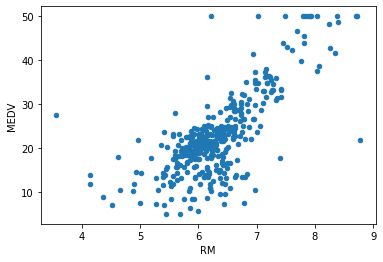

In [21]:
train_data.plot.scatter(x='RM',y='MEDV')

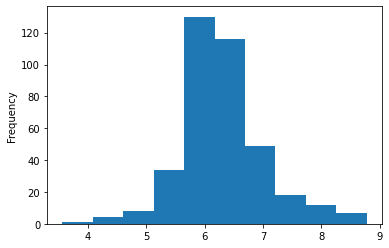

In [22]:
train_data.RM.plot(kind='hist')

RM변수는 3.5~8.7사이에 있다는 것을 알 수 있다.

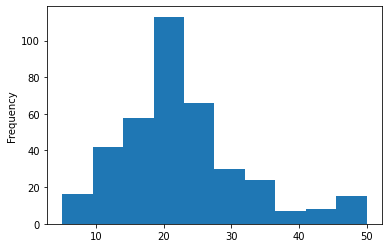

In [23]:
train_data.MEDV.plot(kind='hist')

MEDV 변수는 5~50 사이에 있다

### **두 변수간 관계 보기**
RM과 MEDV사이의 관계보기

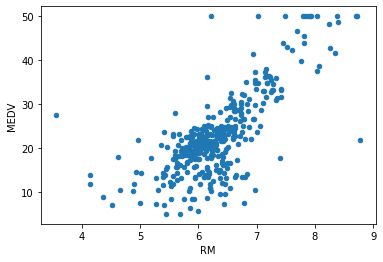

In [24]:
train_data.plot.scatter(x='RM',y='MEDV')

여러 변수 간의 관계 보기

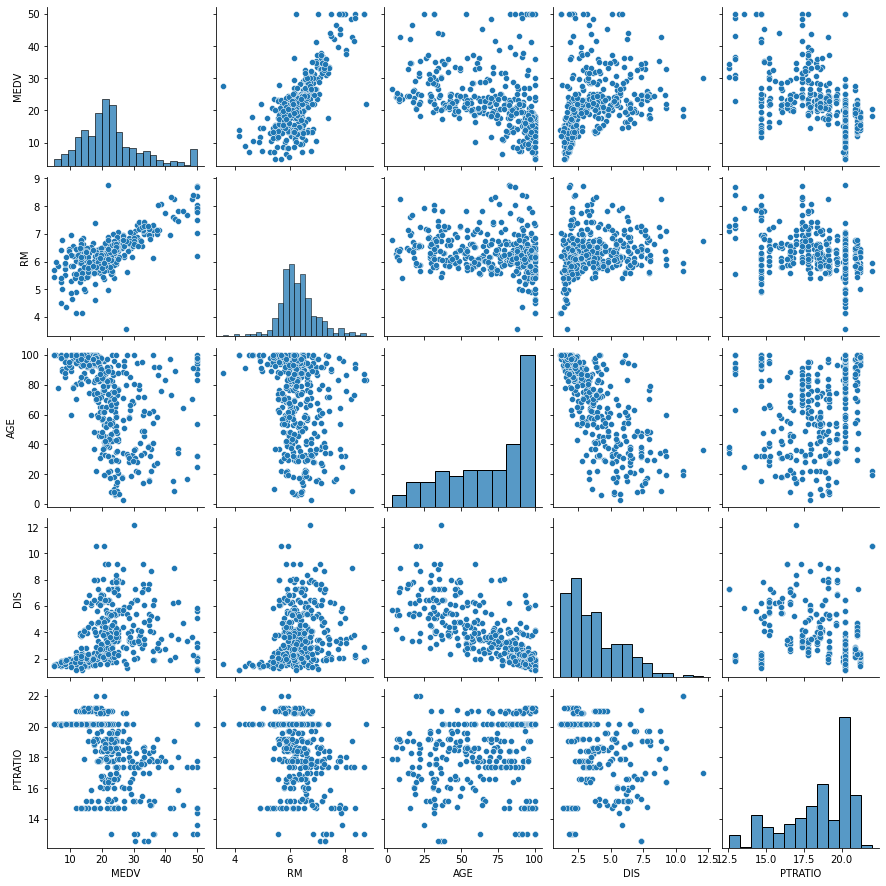

In [25]:
import seaborn as sns

sns.pairplot(train_data[["MEDV","RM","AGE","DIS","PTRATIO"]]);

## **전처리(Preprocessing)**

이 데이터셋은 잘 정제된 데이터셋이기 때문에 중복된 값이나 불량 데이터가 없다. 따라서 여기서 Feature scaling 정도의 간단한 전처리만을 수행해보자.

Feagure scaling

*   0~1 사이에 맞추기
 *   최솟값을 빼고 (최댓값-최솟값)으로 나눈다.
 *   최댓값은 1이 되고, 최솟값은 0이 된다.



*   표준화(Standardization)하기
*   평균을 빼고 표준 편차로 나눈다.
*   원래 분포가 정규분포인 경우 평균이 0이고 표준 편차가 1인 표준정규분포로 바뀐다. 
*   대부분의 값이 -2~2사이에 위치한다.

이 예시에서는 표준화(Standardization)을 쓴다.

학습 데이터셋의 전처리 과정에서 사용한 매개변수(parameter)는 테스트에서 동일하게 사용해야 한다. 이 예시에서는 학습 데이터셋에서 구한 변수의 평균과 표준편차를 저장해놓고 테스트에서 동일하게 사용할 것이다.








In [26]:
train_data.RM.std()

0.7143763402044276

# **method chaining**

In [27]:
RM_mean=train_data.RM.mean()
RM_std=train_data.RM.std()

MEDV_mean=train_data.MEDV.mean()
MEDV_std=train_data.MEDV.std()

processed_data=(train_data
                .assign(RM_standard=lambda x:(x.RM-RM_mean)/RM_std)
                .assign(MEDV_standard=lambda x:(x.MEDV-MEDV_mean)/MEDV_std)
)
processed_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RM_standard,MEDV_standard
478,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03,14.6,-0.174963,-0.870000
54,0.01360,75.0,4.00,0.0,0.410,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80,18.9,-0.590710,-0.406502
159,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39,23.3,0.279979,0.067774
250,0.14030,22.0,5.86,0.0,0.431,6.487,13.0,7.3967,7.0,330.0,19.1,396.28,5.90,24.4,0.247783,0.186343
474,8.05579,0.0,18.10,0.0,0.584,5.427,95.4,2.4298,24.0,666.0,20.2,352.58,18.14,13.8,-1.236028,-0.956232


## **Model Selection**

이 예제의 목적을 위해 예측 모델은 생각할 수 있는 가장 간단한 모델을 사용한다. 즉, RM_standard 값의 $\theta_1$배가 MEDV_standard라고 예측한다. $\theta_1$은 1.2로 정한다. 나중에 이 값을 사람이 직접 정하지 않고 머신 러닝 알고리즘을 이용해 학습하는 방법을 소개할 것이다.

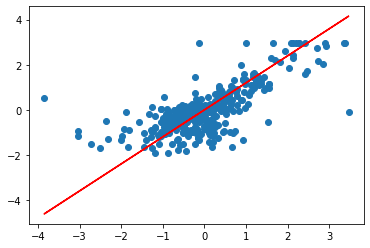

In [28]:
from matplotlib import pyplot as plt
import numpy as np

x=processed_data.RM_standard
y=processed_data.MEDV_standard
theta_1=1.2
y_hat=theta_1*x

plt.scatter(x=x,y=y)
plt.plot(x,y_hat,'r');

## **평가 및 예측(Evaluation & Prediction)**
모델의 평가는 모델이 학습된 학습용 데이터셋이 아니라 모델이 아직 보지 못한 평가용 데이터셋으로 한다. 모델이 새로운 데이터에 대해 얼마나 일반화 하여 적용할 수 있는지 평가하는 것이 목적이기 때문이다.

먼저, 평가용 데이터셋을 학습용 데이터셋과 동일한 방식으로 전처리하여야 한다. 이 때 파라미터들은 학습용 데이터셋에서 구한 값을 사용한다.

In [29]:
processed_test_data=(test_data
                     .assign(RM_standard=lambda x:(x.RM-RM_mean)/RM_std)
                     .assign(MEDV_standard=lambda x:(x.MEDV-MEDV_mean)/MEDV_std)
                     )
processed_test_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RM_standard,MEDV_standard
331,0.05023,35.0,6.06,0.0,0.4379,5.706,28.4,6.6407,1.0,304.0,16.9,394.02,12.43,17.1,-0.845478,-0.600525
418,73.53410,0.0,18.10,0.0,0.6790,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8,-0.494123,-1.495183
73,0.19539,0.0,10.81,0.0,0.4130,6.245,6.2,5.2873,4.0,305.0,19.2,377.17,7.54,23.4,-0.090974,0.078553
409,14.43830,0.0,18.10,0.0,0.5970,6.852,100.0,1.4655,24.0,666.0,20.2,179.36,19.78,27.5,0.758719,0.520493
201,0.03445,82.5,2.03,0.0,0.4150,6.162,38.4,6.2700,2.0,348.0,14.7,393.77,7.43,24.1,-0.207159,0.154006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.11027,25.0,5.13,0.0,0.4530,6.456,67.8,7.2255,8.0,284.0,19.7,396.90,6.73,22.2,0.204389,-0.050795
28,0.77299,0.0,8.14,0.0,0.5380,6.495,94.4,4.4547,4.0,307.0,21.0,387.94,12.80,18.4,0.258982,-0.460397
94,0.04294,28.0,15.04,0.0,0.4640,6.249,77.3,3.6150,4.0,270.0,18.2,396.90,10.59,20.6,-0.085374,-0.223259
124,0.09849,0.0,25.65,0.0,0.5810,5.879,95.8,2.0063,2.0,188.0,19.1,379.38,17.58,18.8,-0.603309,-0.417281


전처리된 평가용 데이터셋을 이용해 우리가 예측하고자 하는 변수의 예측값을 만든다

In [30]:
x_test=processed_test_data.RM_standard
y_test=processed_test_data.MEDV_standard
y_hat_test=theta_1*x_test

모델을 평가하기 위해서는 기준이 필요하다. 회귀 문제(Regression problem)에서 가장 널리 쓰이는 평가 방법은 RMSE(Root Mean Squared Error)이다. 계산하는 방법은 실제값과 예측값의 차이를 제곱하여 모두 더한 뒤 제곱근을 취하는 것이다.

$$RMSE = \sqrt{\frac{1}{n}\sum^n_{i=1} (y^{(i)} - \hat{y}^{(i)})^2}$$

먼저, 학습용 데이터셋에서의 RMSE를 구해보면 다음과 같다

In [35]:
residual=y-y_hat
n=len(x)
RMSE=(1/n*(residual**2).sum())**(1/2)
RMSE

0.8211544688863864

이제는 평가용 데이터셋에서의 RMSE를 구해보자

In [36]:
residual_test=y_test-y_hat_test
n_test=len(x_test)
RMSE_test=(1/n_test*(residual_test**2).sum())**(1/2)
RMSE_test

0.9835464360336791

학습용 데이터셋에서의 지표와 평가용 데이터셋에서의 지표 간의 차이는 나중에 모델의 성능을 이해하는데 중요한 역할을 할 것이다

## **머신러닝**
위에서 모델 파라미터의 값을 손으로 지정했다. 이제 데이터를 통해 자동으로 계산해보도록 하자.

이를 위해 Scikit-learn의 Linear regression 모델을 사용한다.

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model=LinearRegression()
model.fit(pd.DataFrame(x),y)

LinearRegression()

In [39]:
model.coef_

array([0.73496729])

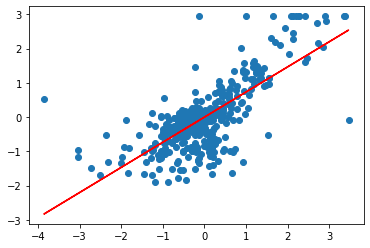

In [40]:
y_hat=model.predict(pd.DataFrame(x))

plt.scatter(x=x,y=y)
plt.plot(x,y_hat,'r');

In [43]:
y_hat_test=model.predict(pd.DataFrame(x_test))

In [50]:
residual=y-y_hat
n=len(x)
RMSE=(1/n_test*(residual_test**2).sum()**(1/2))
RMSE

0.08727563323275044

In [51]:
residual_test=y_test-y_hat_test
n_test=len(x_test)
RMSE_test=(1/n_test*(residual_test**2).sum()**(1/2))
RMSE_test

0.07179957035950171